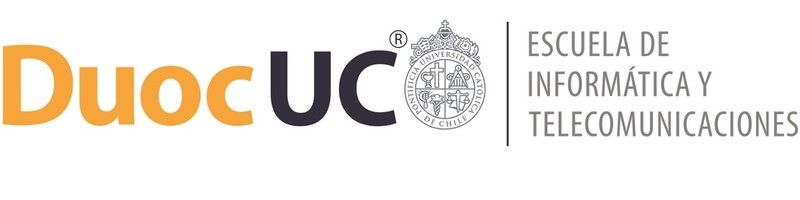

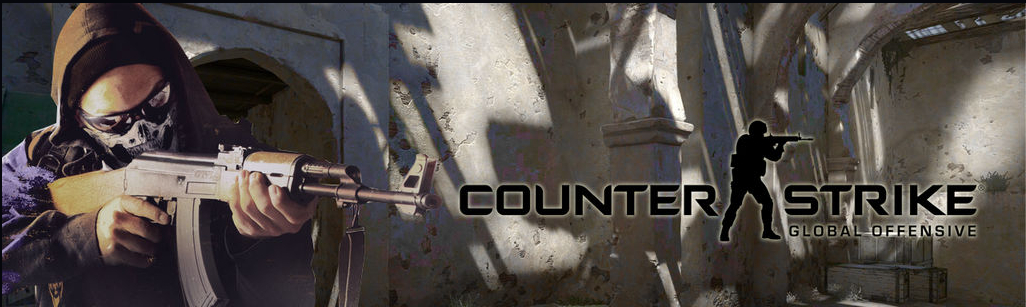

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Marcelo Soto
* ChatGPT

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding



# **Contexto de Negocio: CS:GO y el Valor de las Estadísticas**

**Counter-Strike: Global Offensive (CS:GO)** es un videojuego de disparos en primera persona de tipo competitivo, donde dos equipos —*Terroristas* y *Antiterroristas*— compiten en rondas por cumplir objetivos como plantar/desactivar una bomba o eliminar al equipo contrario.

Cada jugador participa en múltiples rondas dentro de una partida (*MatchId*), y su rendimiento se mide a través de estadísticas detalladas por ronda y jugador.

Este conjunto de datos incluye variables como:
* Tipo de arma utilizada
* Daño causado
* Kills, headshots y asistencias
* Distancia recorrida
* Uso de granadas, entre otras

Estas estadísticas pueden ser aprovechadas para múltiples fines:
* 📊 **Optimización del rendimiento individual y del equipo**
* 🧠 **Desarrollo de sistemas de inteligencia artificial realistas o entrenadores virtuales**
* 🔍 **Detección de trampas o partidas manipuladas**
* 🛠️ **Creación de motores de recomendación personalizados (armas, estrategias)**
* 💵 **Análisis predictivo para apuestas, scouting de jugadores, entre otros modelos de monetización**

Estas estadísticas son útiles tanto para equipos profesionales como para motores de recomendación o detección de comportamiento anómalo.

---

# **Hipótesis de Negocio**

A partir de los datos disponibles, se pueden definir problemas tanto de regresión como de clasificación.

## Hipótesis para Tareas de Regresión

* **Relación entre desempeño de apoyo, precisión de disparo y elección de arma (Rifle de asalto) con la cantidad de kills en una partida.**
  *Variable objetivo:* `MatchKills`
  *Variables predictoras:* `MatchAssists`, `MatchHeadshots`, `PrimaryAssaultRifle`.

---

## Hipótesis para Tareas de Clasificación

* **¿En el mapa nuke los anti-terroristas tienen más probabilidad de ganar rondas que los terroristas?**  
  *Variable objetivo:* `RoundWinner`
  *Variables predictoras:* `InternalTeamId`, `RoundStartingEquipmentValue`, `TeamStartingEquipmentValue`, `Survived`.

---

# **Relación con Contenidos de la Asignatura**


Este caso práctico permite aplicar los conceptos abordados en el curso, tales como:

* **Modelado de regresión**  
  Para predecir variables numéricas como `TimeAlive` o `MatchKills`.

* **Modelado de clasificación**  
  Para predecir etiquetas categóricas como `Survived` o `RoundWinner`.

* **Preprocesamiento de datos**  
  Limpieza, manejo de valores nulos, codificación de variables categóricas, normalización.

* **Selección de atributos relevantes**  
  Uso de técnicas como correlación, `RandomForestFeatureImportance`, análisis de varianza (ANOVA), entre otras.

* **Evaluación de modelos**  
  * Regresión: `MAE`, `RMSE`, `R²`  
  * Clasificación: `Accuracy`, `Precision`, `Recall`, `F1-score`, `Matriz de Confusión`

* **Detección de anomalías y outliers**  
  Identificación de partidas fuera del comportamiento normal, posible trampa o manipulación.


In [ ]:
#Importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Set2")

from google.colab import files
uploaded = files.upload()

original_filename = list(uploaded.keys())[0]
print(f"Nombre original del archivo: {original_filename}")

# Renombrar a algo más simple
new_filename = "csgo_dataset.csv"
os.rename(original_filename, new_filename)

# Cargar el dataset
df_modified = pd.read_csv(new_filename, engine='python')
df_modified.head(10)

Saving df_modified limpio.csv to df_modified limpio.csv
Nombre original del archivo: df_modified limpio.csv


,PlayerID,Map,InternalTeamId,MatchId,RoundId,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Tiempo,Distancia,Participacion_Kills,Granadas
0,600,inferno,1,4,1,0,0,750,4400,45,100,0,4
1,601,inferno,1,4,1,0,0,800,4400,43,88,0,0
2,602,inferno,1,4,1,0,0,1000,4400,37,56,0,0
3,603,inferno,1,4,1,0,0,850,4400,47,89,0,0
4,604,inferno,1,4,1,0,0,1000,4400,53,108,0,2
5,605,inferno,2,4,1,0,0,850,3750,53,78,0,0
6,606,inferno,2,4,1,0,0,400,3750,53,80,0,2
7,607,inferno,2,4,1,0,0,800,3750,53,68,1,0
8,608,inferno,2,4,1,1,1,850,3750,53,87,3,0
9,609,inferno,2,4,1,2,0,850,3750,53,78,2,0


In [ ]:
# prompt: dame la info de que es cada columna de df

df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PlayerID                     79157 non-null  int64 
 1   Map                          79157 non-null  object
 2   InternalTeamId               79157 non-null  int64 
 3   MatchId                      79157 non-null  int64 
 4   RoundId                      79157 non-null  int64 
 5   RoundHeadshots               79157 non-null  int64 
 6   RoundFlankKills              79157 non-null  int64 
 7   RoundStartingEquipmentValue  79157 non-null  int64 
 8   TeamStartingEquipmentValue   79157 non-null  int64 
 9   Tiempo                       79157 non-null  int64 
 10  Distancia                    79157 non-null  int64 
 11  Participacion_Kills          79157 non-null  int64 
 12  Granadas                     79157 non-null  int64 
dtypes: int64(12), object(1)
memory 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 1.1. ¿Cuántos valores faltan por columna?
print(df_modified.isnull().sum())

# 1.2. Si prefieres eliminar filas que tengan NaN en variables clave:
cols_importantes = ['Distancia', 'RoundStartingEquipmentValue', 'Participacion_Kills', 'Tiempo']
df_modified.dropna(subset=cols_importantes, inplace=True)

# 1.3. O bien, imputar (por ejemplo) con la mediana para columnas numéricas:
imputer = SimpleImputer(strategy='median')
columnas_num = ['Distancia', 'RoundStartingEquipmentValue', 'Participacion_Kills', 'Tiempo']
df_modified[columnas_num] = imputer.fit_transform(df_modified[columnas_num])

# 1.4. Verifica de nuevo que ya no haya valores faltantes:
print(df_modified.isnull().sum())


PlayerID                       0
Map                            0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
Tiempo                         0
Distancia                      0
Participacion_Kills            0
Granadas                       0
dtype: int64
PlayerID                       0
Map                            0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
Tiempo                         0
Distancia                      0
Participacion_Kills            0
Granadas                       0
dtype: int64


In [ ]:
# 2.1. Identificar qué columnas son de tipo "object" o "category":
cols_categóricas = df_modified.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas:", cols_categóricas)

# 2.2. Si no hay ninguna, este paso no aplica.
# Si hay, por ejemplo, 'Mapa' o 'ModoJuego', puedes usar one-hot encoding:
if cols_categóricas:
    df_modified = pd.get_dummies(df_modified,
                                 columns=cols_categóricas,
                                 drop_first=True)
    print("Después de one-hot encoding:", df_modified.shape)


Columnas categóricas: ['Map']
Después de one-hot encoding: (79157, 15)


In [ ]:
# 3.1. Función para detectar rangos IQR y filtrar outliers en una sola columna:
def filtrar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    rango_inf = Q1 - 1.5 * IQR
    rango_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= rango_inf) & (df[col] <= rango_sup)]

# 3.2. Ejemplo: filtrar outliers en 'Distancia' y 'RoundStartingEquipmentValue'
columnas_a_filtrar = ['Distancia', 'RoundStartingEquipmentValue', 'Participacion_Kills']
for col in columnas_a_filtrar:
    antes = df_modified.shape[0]
    df_modified = filtrar_outliers_iqr(df_modified, col)
    después = df_modified.shape[0]
    print(f"Outliers eliminados en '{col}': {antes - después}")

# 3.3. Si solo quieres identificarlos sin quitar, imprime sus valores:
for col in columnas_a_filtrar:
    Q1 = df_modified[col].quantile(0.25)
    Q3 = df_modified[col].quantile(0.75)
    IQR = Q3 - Q1
    rango_inf = Q1 - 1.5 * IQR
    rango_sup = Q3 + 1.5 * IQR
    mask = (df_modified[col] < rango_inf) | (df_modified[col] > rango_sup)
    print(f"\nOutliers en '{col}':")
    print(df_modified.loc[mask, col].describe())


Outliers eliminados en 'Distancia': 1510
Outliers eliminados en 'RoundStartingEquipmentValue': 0
Outliers eliminados en 'Participacion_Kills': 4906

Outliers en 'Distancia':
count    428.000000
mean     199.684579
std        2.346165
min      196.000000
25%      198.000000
50%      200.000000
75%      202.000000
max      203.000000
Name: Distancia, dtype: float64

Outliers en 'RoundStartingEquipmentValue':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: RoundStartingEquipmentValue, dtype: float64

Outliers en 'Participacion_Kills':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Participacion_Kills, dtype: float64


=== Importancia de cada característica ===
Distancia                      0.466047
RoundStartingEquipmentValue    0.341025
Granadas                       0.114370
Participacion_Kills            0.078558
dtype: float64


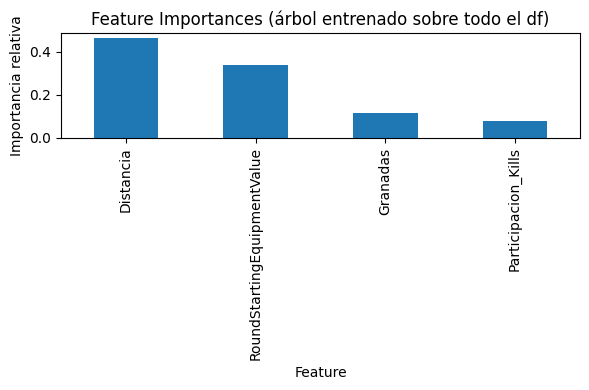

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# —————————————————————————————
# 1. Definir X e y sobre df_modified limpio
# —————————————————————————————
# Asume que df_modified ya está sin outliers y sin NaN
X = df_modified[['Distancia', 'RoundStartingEquipmentValue', 'Participacion_Kills', 'Granadas']]
y = df_modified['Tiempo']

# —————————————————————————————
# 2. Entrenar un Decision Tree "rápido"
# —————————————————————————————
# Aquí entrenamos sobre todo el conjunto.
# Luego solo extraemos importancias; puedes volver a usar un split más adelante.
tree_temp = DecisionTreeRegressor(
    criterion='squared_error',  # reemplaza 'mse' por 'squared_error'
    max_depth=None,             # sin límite de profundidad para ver la contribución total
    random_state=42
)
tree_temp.fit(X, y)

# —————————————————————————————
# 3. Extraer feature importances
# —————————————————————————————
importances = tree_temp.feature_importances_
fi = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("=== Importancia de cada característica ===")
print(fi)

# —————————————————————————————
# 4. Visualizar en un bar chart
# —————————————————————————————
plt.figure(figsize=(6, 4))
fi.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importancia relativa')
plt.title('Feature Importances (árbol entrenado sobre todo el df)')
plt.tight_layout()
plt.show()


==== Métricas en conjunto de prueba ====
RMSE: 24.43
MAE : 18.82
R²  : 0.1943


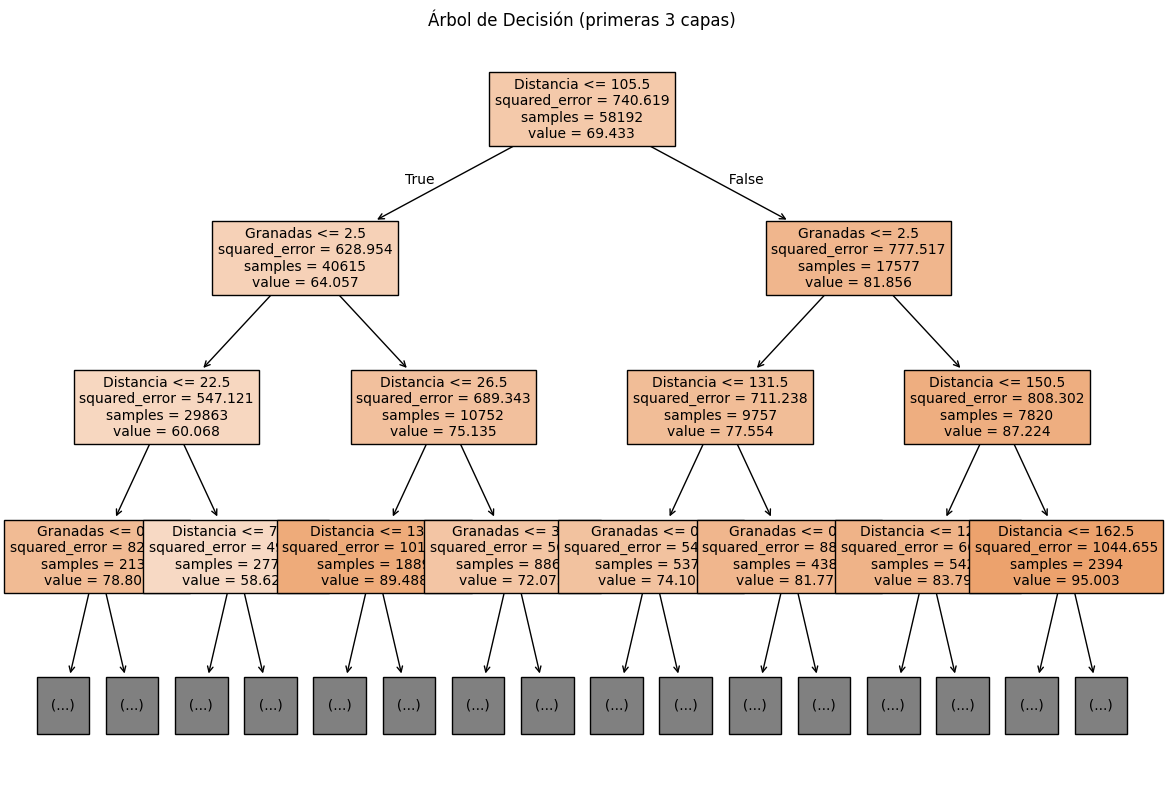


=== Importancia final de cada característica ===
Distancia                      0.677348
Granadas                       0.259453
RoundStartingEquipmentValue    0.059192
Participacion_Kills            0.004007
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# —————————————————————————————
# 1. Definir X e y sobre df_modified limpio y con las features seleccionadas
# —————————————————————————————
# Asume que df_modified ya está sin outliers y sin NaN
X = df_modified[['Distancia', 'RoundStartingEquipmentValue', 'Granadas', 'Participacion_Kills']]
y = df_modified['Tiempo']

# —————————————————————————————
# 2. Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
# —————————————————————————————
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# —————————————————————————————
# 3. Instanciar y entrenar el Decision Tree usando las features seleccionadas
#    Ajustamos hiperparámetros para controlar la complejidad
# —————————————————————————————
tree = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,
    min_samples_leaf=5,
    random_state=42
)
tree.fit(X_train, y_train)

# —————————————————————————————
# 4. Evaluar el modelo en el conjunto de prueba
# —————————————————————————————
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("==== Métricas en conjunto de prueba ====")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# —————————————————————————————
# 5. Visualizar el árbol de decisión (hasta profundidad 3 para mayor claridad)
# —————————————————————————————
plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.title("Árbol de Decisión (primeras 3 capas)")
plt.tight_layout()
plt.show()

# —————————————————————————————
# 6. (Opcional) Mostrar nuevamente las importancias de cada feature
# —————————————————————————————
importances = tree.feature_importances_
fi = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\n=== Importancia final de cada característica ===")
print(fi)



RMSE: Indica el error promedio de predicción en unidades de tiempo; valores bajos sugieren buena precisión del modelo general estadístico.

MAE: Mide error promedio absoluto entre predicciones y valores reales; sensibilidad moderada a outliers, facilidad de interpretación en métricas comparables.

R²: Explica proporción de varianza explicada por el modelo; cercano a uno indica ajuste fuerte y mayor capacidad predictiva global.



Explicación del Árbol de Decisión
El nodo raíz divide según Distancia ≤ 105.5:

A la izquierda (True), los jugadores con distancia pequeña (≤105.5) continúan; a la derecha (False), los de distancia mayor.

En la rama izquierda (Distancia ≤ 105.5), se evalúa Granadas ≤ 2.5:

Si Granadas ≤ 2.5, entonces el siguiente split es Distancia ≤ 22.5:

Distancia ≤ 22.5: predice tiempo promedio ≈ 60.07.

Distancia > 22.5 (pero ≤105.5 y granadas ≤2.5): predice ≈ 58.62.

Si Granadas > 2.5, entonces el split es Distancia ≤ 26.5:

Distancia ≤ 26.5: predice ≈ 89.49.

Distancia > 26.5: predice ≈ 72.07.

En la rama derecha (Distancia > 105.5), de nuevo se evalúa Granadas ≤ 2.5:

Si Granadas ≤ 2.5, el siguiente split es Distancia ≤ 131.5:

Distancia ≤ 131.5: predice ≈ 77.55.

Distancia > 131.5: predice ≈ 81.77.

Si Granadas > 2.5, entonces el split es Distancia ≤ 150.5:

Distancia ≤ 150.5: predice ≈ 83.79.

Distancia > 150.5: predice ≈ 95.00.

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
=== Mejores hiperparámetros encontrados ===
{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
RMSE promedio en validación cruzada: 24.08

=== Métricas en conjunto de prueba ===
RMSE: 24.43
MAE : 18.82
R²  : 0.1943


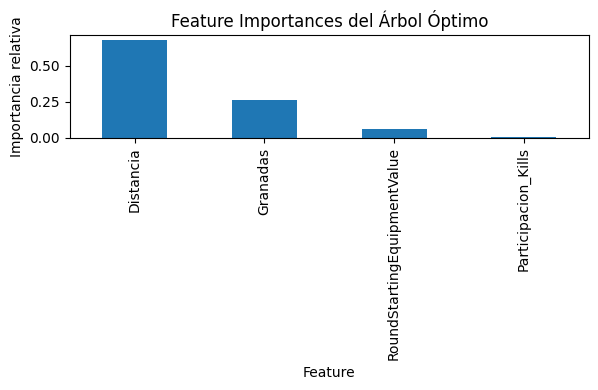

==== Métricas en conjunto de prueba ====
RMSE: 24.43
MAE : 18.82
R²  : 0.1943


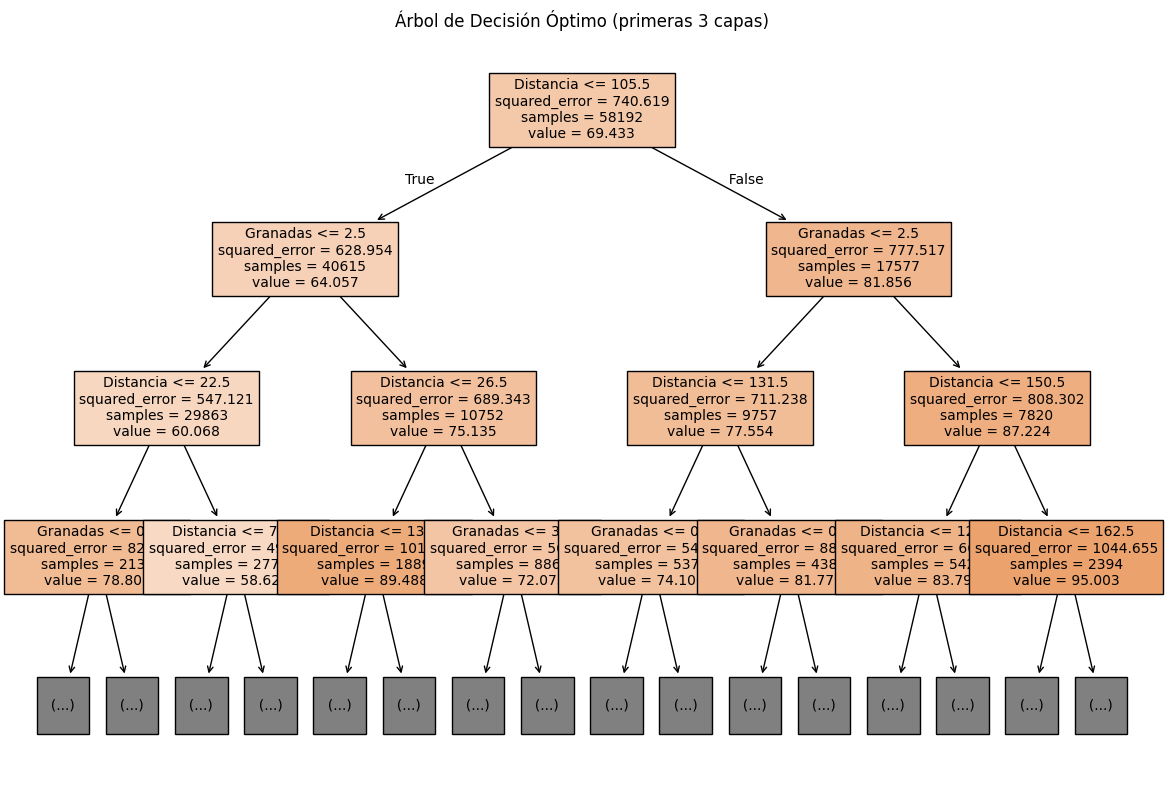

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# —————————————————————————————
# 1. Definir X e y sobre df_modified limpio
# —————————————————————————————
# Asume que df_modified ya está cargado y limpio
X = df_modified[['Distancia', 'RoundStartingEquipmentValue', 'Granadas', 'Participacion_Kills']]
y = df_modified['Tiempo']

# —————————————————————————————
# 2. Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
# —————————————————————————————
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# —————————————————————————————
# 3. Instanciar y entrenar el Decision Tree con los mejores hiperparámetros
# —————————————————————————————
tree_best = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features=None,
    random_state=42
)
tree_best.fit(X_train, y_train)

# —————————————————————————————
# 4. Evaluar el modelo en el conjunto de prueba
# —————————————————————————————
y_pred = tree_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("==== Métricas en conjunto de prueba ====")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE : {mae_test:.2f}")
print(f"R²  : {r2_test:.4f}")

# —————————————————————————————
# 5. Graficar el árbol de decisión (hasta profundidad 3 para mayor claridad)
# —————————————————————————————
plt.figure(figsize=(12, 8))
plot_tree(
    tree_best,
    feature_names=X.columns,
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.title("Árbol de Decisión Óptimo (primeras 3 capas)")
plt.tight_layout()
plt.show()



===== MAPA: inferno =====
Muestras disponibles: 26509
   Métricas en conjunto de prueba:
   RMSE: 25.63
   MAE : 19.70
   R²  : 0.1958


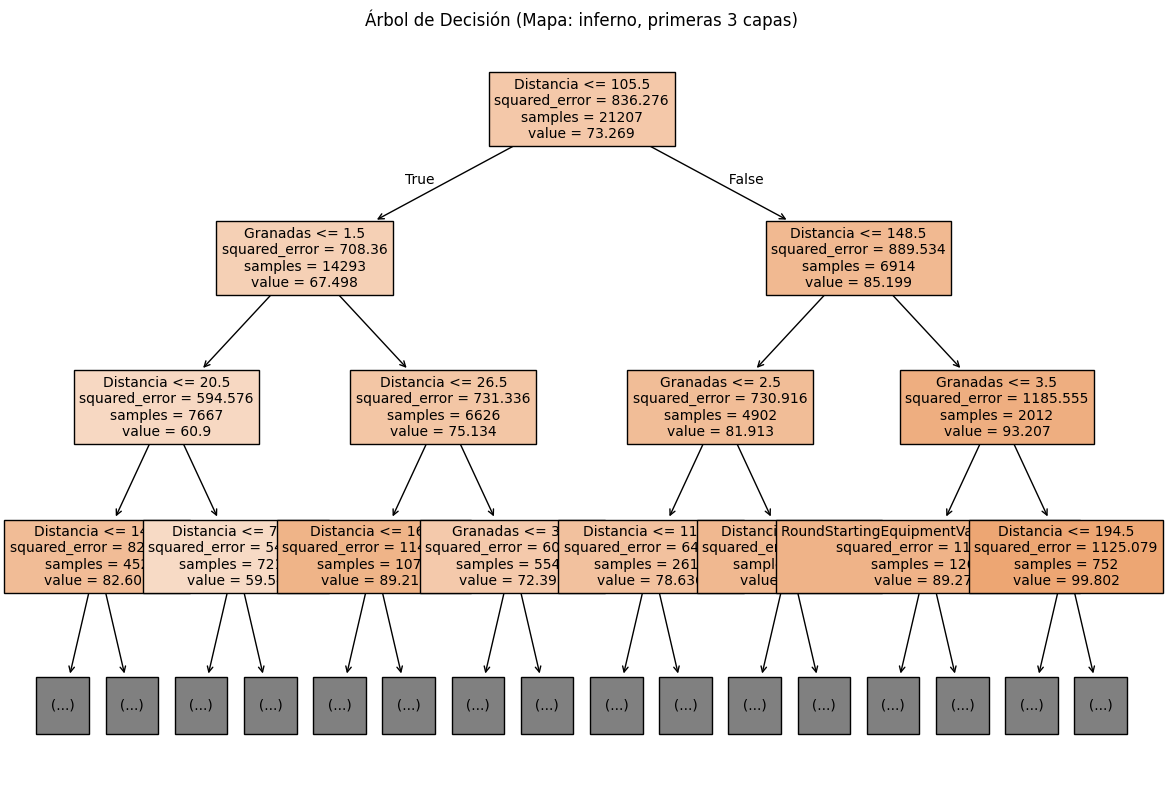


===== MAPA: mirage =====
Muestras disponibles: 17449
   Métricas en conjunto de prueba:
   RMSE: 21.81
   MAE : 16.98
   R²  : 0.2060


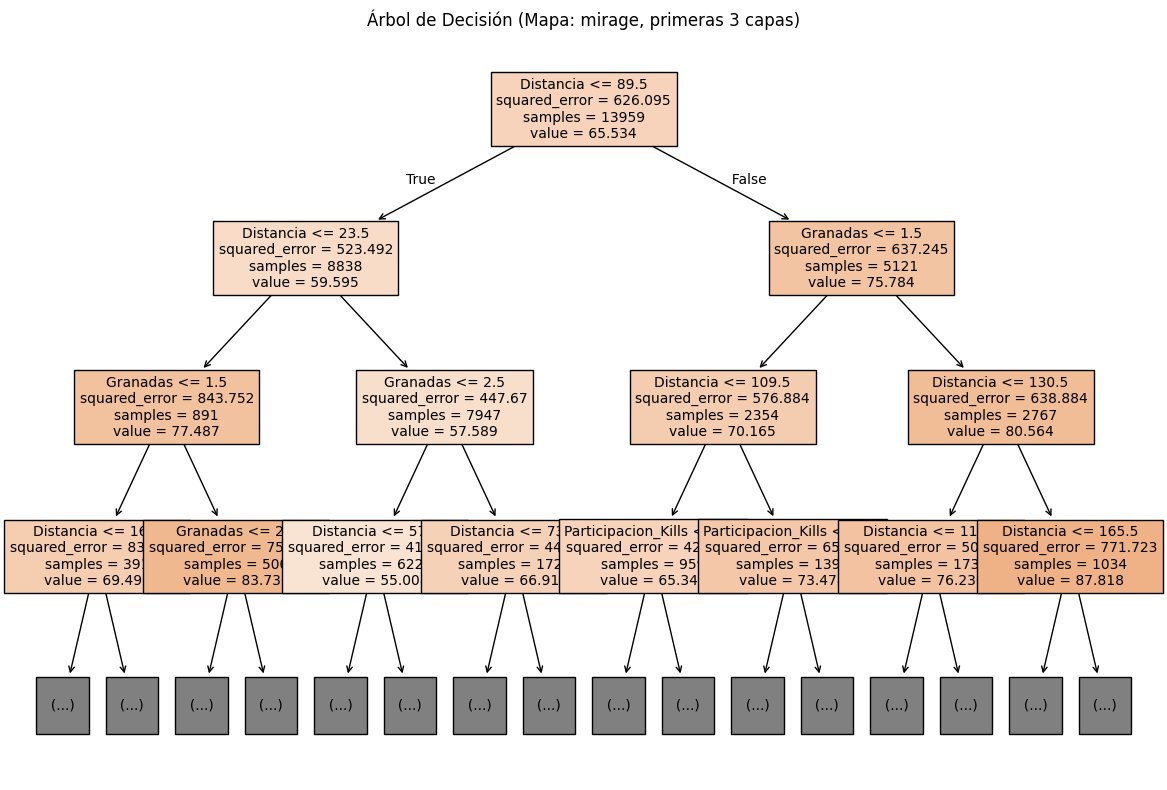


===== MAPA: nuke =====
Muestras disponibles: 11254
   Métricas en conjunto de prueba:
   RMSE: 22.69
   MAE : 17.30
   R²  : 0.2255


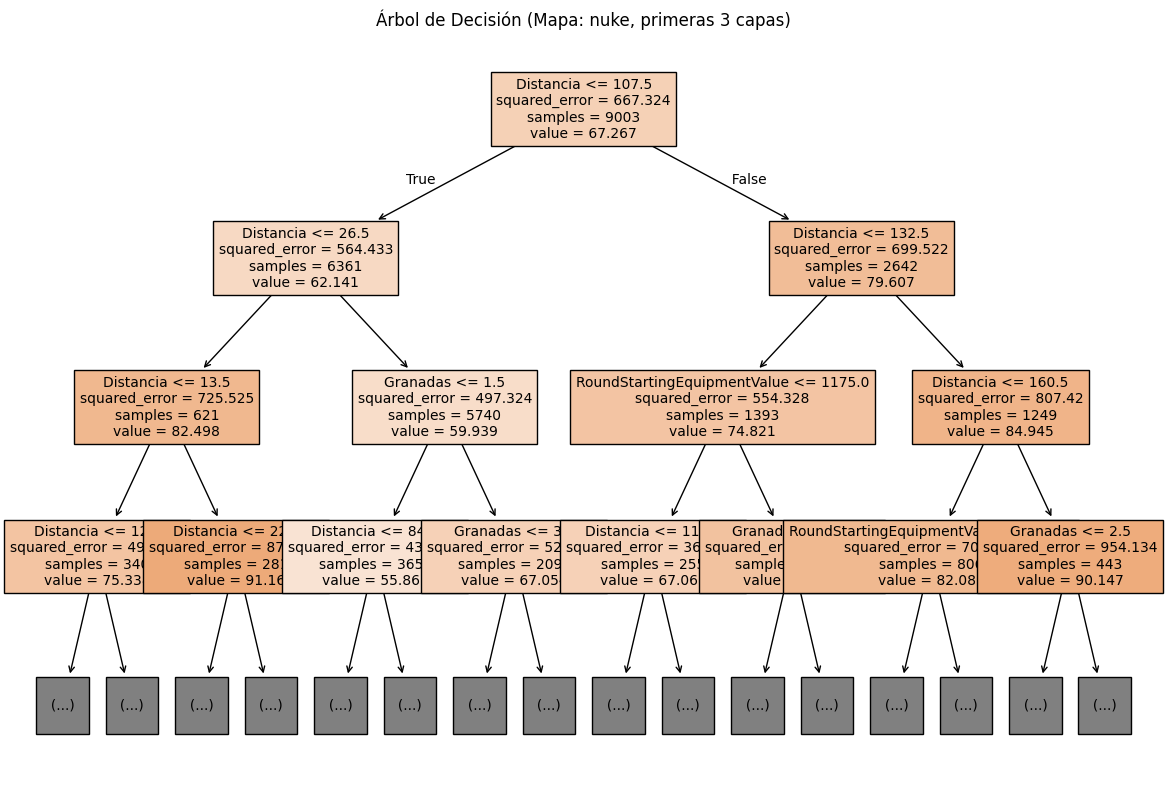


===== MAPA: dust2 =====
Muestras disponibles: 17529
   Métricas en conjunto de prueba:
   RMSE: 24.24
   MAE : 18.88
   R²  : 0.2010


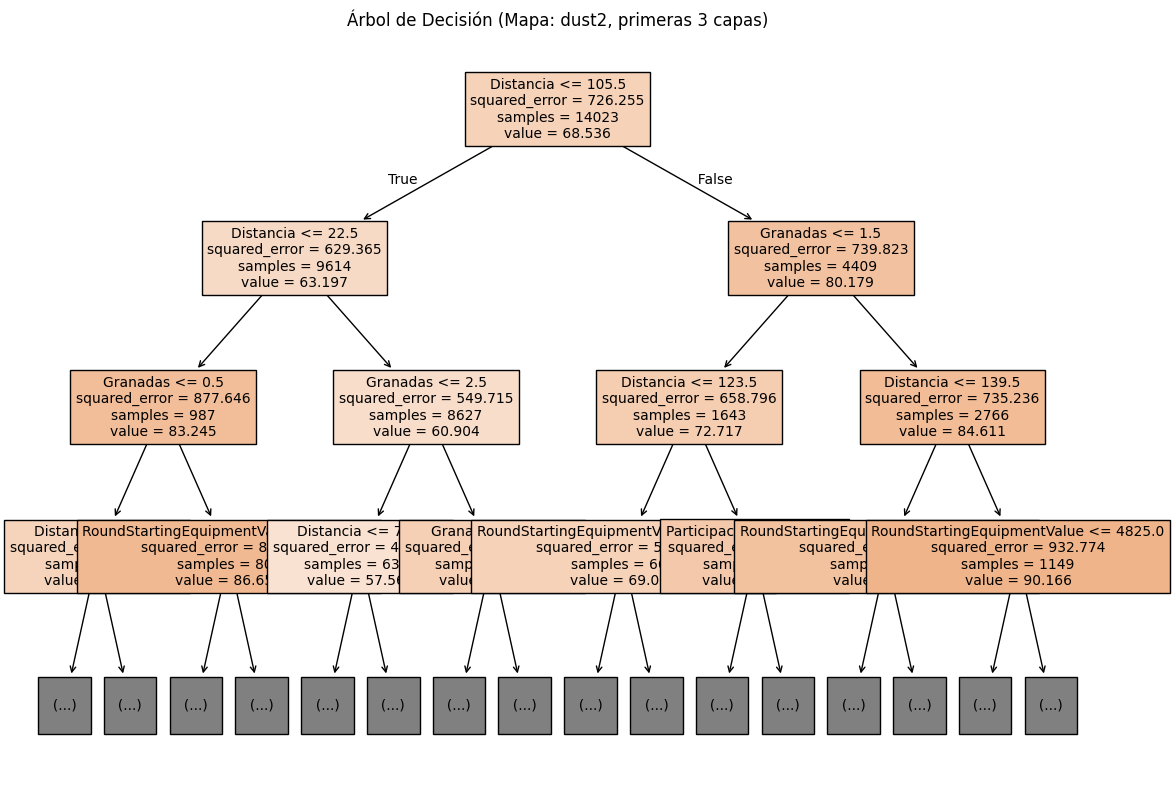

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# —————————————————————————————
# 0. Definir los mapas y sus columnas dummies
# —————————————————————————————
maps = {
    'inferno' : 'Map_inferno',
    'mirage'  : 'Map_mirage',
    'nuke'    : 'Map_nuke',
    'dust2'   : None   # será cuando todas las dummies anteriores sean 0
}

# —————————————————————————————
# 1. Iterar sobre cada mapa y entrenar un árbol separado
# —————————————————————————————
for map_name, dummy_col in maps.items():
    if dummy_col is None:
        # Filtrar filas donde inferno, mirage y nuke sean 0 → corresponde a dust2
        df_map = df_modified[
            (df_modified['Map_inferno']  == 0) &
            (df_modified['Map_mirage']   == 0) &
            (df_modified['Map_nuke']     == 0)
        ].copy()
    else:
        # Filtrar filas donde la dummy del mapa sea 1
        df_map = df_modified[df_modified[dummy_col] == 1].copy()

    print(f"\n===== MAPA: {map_name} =====")
    print(f"Muestras disponibles: {df_map.shape[0]}")

    # 2. Definir X e y para este subconjunto
    X = df_map[['Distancia', 'RoundStartingEquipmentValue', 'Granadas', 'Participacion_Kills']]
    y = df_map['Tiempo']

    # 3. Verificar que haya suficientes muestras para train/test
    if df_map.shape[0] < 20:
        print("   No hay suficientes muestras para entrenar un árbol robusto. Se omite este mapa.")
        continue

    # 4. Dividir en train/test (80%/20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    # 5. Instanciar y entrenar el Decision Tree con los mejores hiperparámetros
    tree_map = DecisionTreeRegressor(
        criterion='squared_error',
        max_depth=6,
        min_samples_split=2,
        min_samples_leaf=5,
        max_features=None,
        random_state=42
    )
    tree_map.fit(X_train, y_train)

    # 6. Evaluar el modelo en el conjunto de prueba
    y_pred = tree_map.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test  = mean_absolute_error(y_test, y_pred)
    r2_test   = r2_score(y_test, y_pred)

    print("   Métricas en conjunto de prueba:")
    print(f"   RMSE: {rmse_test:.2f}")
    print(f"   MAE : {mae_test:.2f}")
    print(f"   R²  : {r2_test:.4f}")

    # 7. Graficar el árbol de decisión (primeras 3 capas) para este mapa
    plt.figure(figsize=(12, 8))
    plot_tree(
        tree_map,
        feature_names=X.columns,
        filled=True,
        max_depth=3,
        fontsize=10
    )
    plt.title(f"Árbol de Decisión (Mapa: {map_name}, primeras 3 capas)")
    plt.tight_layout()
    plt.show()


Evaluación de los árboles por mapa

Inferno (26 509 muestras)

RMSE: 25.63, MAE: 19.70, R²: 0.1958
El modelo para Inferno tiene el error de predicción más alto (RMSE 25.63) y la menor proporción de varianza explicada (R² ≈ 0.196). Esto sugiere que, en comparación con los otros mapas, la relación entre las variables predictoras y el tiempo de ronda es más débil o más ruidosa en Inferno.

Mirage (17 449 muestras)

RMSE: 21.81, MAE: 16.98, R²: 0.2060
Para Mirage, el RMSE es el más bajo de todos (21.81) y el R² sube ligeramente a 0.206. Esto indica que el árbol en Mirage capta mejor las tendencias de tiempo en función de Distancia, Granadas y equipamiento inicial, reflejando una predicción más precisa que en Inferno o Dust2.

Nuke (11 254 muestras)

RMSE: 22.69, MAE: 17.30, R²: 0.2255
Nuke presenta el R² más alto (0.2255), lo que significa que este modelo explica cerca del 22 % de la variación en Tiempo. Aunque su RMSE (22.69) es ligeramente superior al de Mirage, su capacidad explicativa es la mejor, probablemente porque las rondas en Nuke siguen patrones más consistentes con los predictores.

Dust2 (17 529 muestras)

RMSE: 24.24, MAE: 18.88, R²: 0.2010
El desempeño en Dust2 queda en un punto intermedio: mejor que Inferno pero peor que Mirage y Nuke. Con un R² de 0.2010, el modelo capta cerca del 20 % de la variabilidad, reflejando que existe cierta coherencia entre las variables, pero aún hay considerable ruido o factores no incluidos.